In [66]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import sklearn.cluster

In [22]:
NORMAL = 0
FIGHTING = 1
FLYING = 2
POISON = 3
GROUND = 4
ROCK = 5
BUG = 6
GHOST = 7
STEEL = 8
FIRE = 9
WATER = 10
GRASS = 11
ELECTRIC = 12
PSYCHIC = 13
ICE = 14
DRAGON = 15
DARK = 16
FAIRY = 17

#formato: lista[tipo atacando][tipo defendendo]
matchup = [
    [1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [2.0, 1.0, 0.5, 0.5, 1.0, 2.0, 0.5, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 2.0, 0.5],
    [1.0, 2.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 0.5, 1.0, 1.0, 2.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0],
    [1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.5, 1.0, 2.0, 2.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 0.5, 2.0, 1.0, 0.5, 1.0, 2.0, 1.0, 0.5, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0],
    [1.0, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.5],
    [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.5, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 2.0, 1.0, 1.0, 2.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 2.0, 1.0, 2.0, 0.5, 0.5, 2.0, 1.0, 1.0, 2.0, 0.5, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0],
    [1.0, 1.0, 0.5, 0.5, 2.0, 2.0, 0.5, 1.0, 0.5, 0.5, 2.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0],
    [1.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.5, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0],
    [1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.0, 1.0],
    [1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 2.0, 1.0, 1.0, 0.5, 2.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.0],
    [1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.5, 0.5],
    [1.0, 2.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0]
]

In [46]:
df = pd.read_csv('pokemon.csv')
df.head()

del df['against_bug']
del df['against_dark']
del df['against_dragon']
del df['against_electric']
del df['against_fairy']
del df['against_fight']
del df['against_fire']
del df['against_flying']
del df['against_ghost']
del df['against_grass']
del df['against_ground']
del df['against_ice']
del df['against_normal']
del df['against_poison']
del df['against_psychic']
del df['against_rock']
del df['against_steel']
del df['against_water']

del df['base_egg_steps']
del df['base_happiness']
del df['capture_rate']
del df['classfication']
del df['experience_growth']
del df['height_m']
del df['japanese_name']
del df['percentage_male']
del df['weight_kg']
del df['generation']
del df['is_legendary']

#del df['base_total']
del df['abilities'] #interessante se sobrar tempo


#substituir NaN por string vazia
df['type2']= df['type2'].fillna(value='')
df.head()

,attack,base_total,defense,hp,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2
0,49,318,49,45,Bulbasaur,1,65,65,45,grass,poison
1,62,405,63,60,Ivysaur,2,80,80,60,grass,poison
2,100,625,123,80,Venusaur,3,122,120,80,grass,poison
3,52,309,43,39,Charmander,4,60,50,65,fire,
4,64,405,58,58,Charmeleon,5,80,65,80,fire,


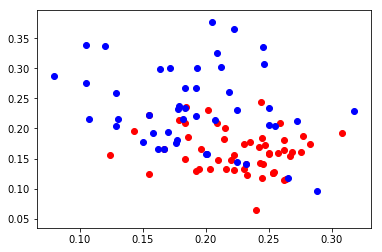

53


In [64]:
fightingtypes=df[ (df['type1'] == 'fighting') | (df['type2'] == 'fighting')]
steeltypes=df[ (df['type1'] == 'steel') | (df['type2'] == 'steel')]

#plt.scatter(df['attack']/df['base_total'], df['defense']/df['base_total'], c='r')
#plt.scatter(df['speed']/df['base_total'], df['defense']/df['base_total'], c='b')

plt.scatter(fightingtypes['attack']/fightingtypes['base_total'], fightingtypes['defense']/fightingtypes['base_total'], c='r')
plt.scatter(steeltypes['attack']/steeltypes['base_total'], steeltypes['defense']/steeltypes['base_total'], c='b')


plt.show()

print(len(fightingtypes))